EDA of Personal Medical Costs from Insurance companies. Source: https://github.com/stedy/Machine-Learning-with-R-datasets

In [1]:
#import packages, libraries and dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from scipy.stats import shapiro, friedmanchisquare, mannwhitneyu

from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

/var/folders/hf/gbszx4551nv47bmf72n2dqdr0000gn/T/ipykernel_2327/2669236758.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#import file
insurance = pd.read_csv("/Users/oluwa/Documents/DATA ANALYSIS/DATA PROJECTS/insurance.csv")

Quick view of data


In [3]:
insurance.shape

(1338, 7)

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
insurance["sex"].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [11]:
insurance["children"].value_counts()


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

# 1. EDA/Plots

In [12]:
# create a column, that classifies anyone with > 2 children as yes for a large family. 
insurance['large_fam'] = np.where(insurance['children'] > 2, 'yes', 'no')
insurance.head()

,age,sex,bmi,children,smoker,region,charges,large_fam
0,19,female,27.900,0,yes,southwest,16884.92400,no
1,18,male,33.770,1,no,southeast,1725.55230,no
2,28,male,33.000,3,no,southeast,4449.46200,yes
3,33,male,22.705,0,no,northwest,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,no


In [13]:
# Split data by size of charges by using quantiles (0.25, 0.5, 0.75)
# we will get 4 groups 
# 1 := (q0, q25], 
# 2 := (q25, q50], 
# 3 := (q50, q75], 
# 4 := (q75, q100]

insurance['charges_class'] = pd.qcut(insurance['charges'], q=4, labels=['1', '2', '3', '4'])
insurance.head()

,age,sex,bmi,children,smoker,region,charges,large_fam,charges_class
0,19,female,27.900,0,yes,southwest,16884.92400,no,4
1,18,male,33.770,1,no,southeast,1725.55230,no,1
2,28,male,33.000,3,no,southeast,4449.46200,yes,1
3,33,male,22.705,0,no,northwest,21984.47061,no,4
4,32,male,28.880,0,no,northwest,3866.85520,no,1


<Axes: ylabel='charges'>

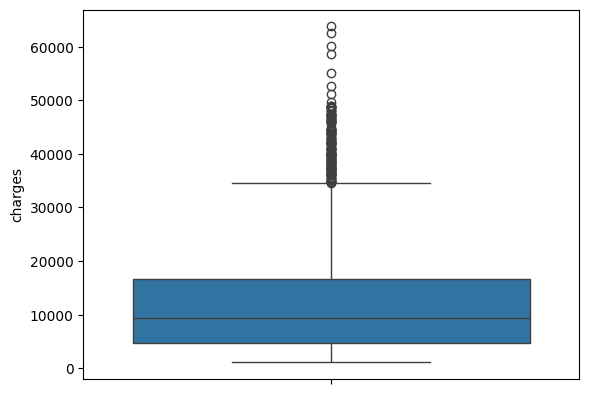

In [14]:
# box plot of charges and its outliers
sns.boxplot(insurance['charges'])

In [15]:
#bmi boxplot
px.box(insurance, x='bmi').show()

In [16]:
# create a plot for sex, smoker, region, and large family. 
fig = make_subplots(rows=1, cols=4, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

for i, col_name in enumerate(insurance.loc[:, insurance.dtypes == 'object']):
    c = insurance[col_name].value_counts()
    fig.add_trace(
        go.Pie(labels=c.index, values=c.values, title=col_name, name=col_name),
        row=1, col=i+1
    )
    
fig.show()

In [17]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "histogram"}, {"type": "histogram"}, {"type": "histogram"}]])

fig.add_trace(go.Histogram(x=insurance['age'], name='age'),
             row=1, col=1)

fig.add_trace(go.Histogram(x=insurance['bmi'], name='bmi'),
             row=1, col=2)

fig.add_trace(go.Histogram(x=insurance['charges'], name='charges'),
             row=1, col=3)

<Axes: xlabel='age', ylabel='charges'>

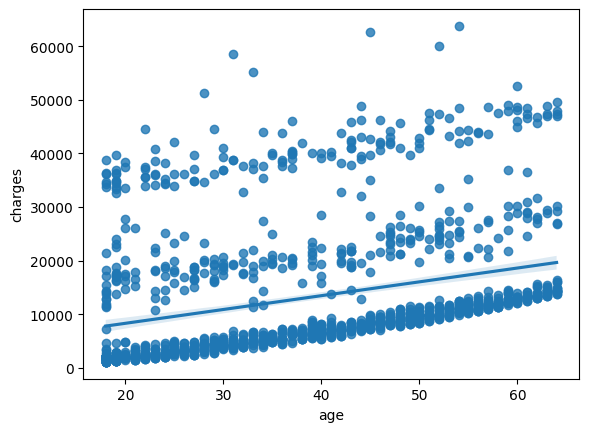

In [18]:
# create a plot of the relationship with age and medical charges
sns.regplot(x="age", y="charges", data=insurance)

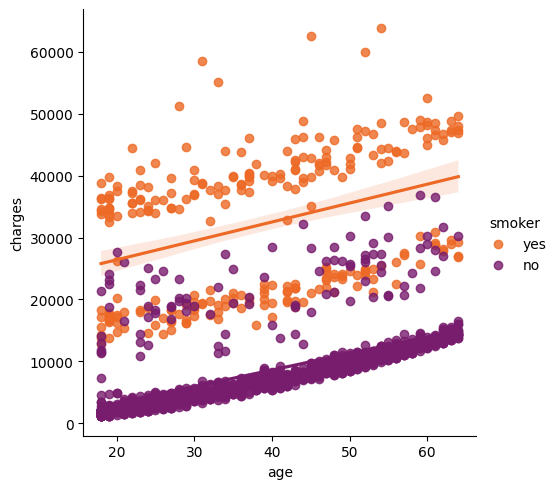

In [19]:
# create a plot of the relationship between smokers and hospital charges
sns.lmplot(x="age", y="charges", hue="smoker", data=insurance, palette = 'inferno_r')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

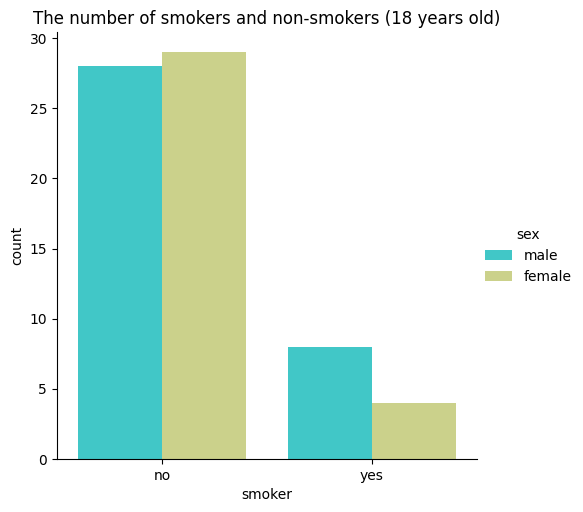

In [20]:
# create a bar graph of 18 year old smokers 
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=insurance[(insurance.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")